In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score
from collections import Counter
from sklearn import datasets
from sklearn import metrics
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts

In [2]:
df = pd.read_csv('Task-Data.csv')
cols = df.columns
Y = df

In [3]:
df.shape

(214, 9)

In [4]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9
0,1.5210,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.5176,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.5162,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.5177,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.5174,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.5162,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.5169,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.5207,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.5165,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [5]:
def simple_DBSCAN(X, clusters, eps, minPts, metric=distance.euclidean):
    
    currentPoint = 0
    
    for i in range(0, X.shape[0]):
        if (clusters[i] != 0):
            continue
    
        neighbors = neighborsGen(X, i, eps, metric)

        if len(neighbors) < minPts:
            clusters[i] = -1

        else:
            currentPoint += 1
            expand(X, clusters, i, neighbors, currentPoint, eps, minPts, metric)
    
    return clusters

In [6]:
def neighborsGen(X, point, eps, metric):
    
    neighbors = []
    
    for i in range(X.shape[0]):
        if (metric(X[point], X[i]) < eps):
            neighbors.append(i)
    
    return neighbors

In [7]:
def expand(X, clusters, point, neighbors, currentPoint, eps, minPts, metric):
   
    clusters[point] = currentPoint
    
    i = 0
    while i < len(neighbors):
        
        nextPoint = neighbors[i]
        
        if clusters[nextPoint] == -1:
            clusters[nextPoint] = currentPoint
        
        elif clusters[nextPoint] == 0:
            clusters[nextPoint] = currentPoint
            
            nextNeighbors = neighborsGen(X, nextPoint, eps, metric)
            
            if len(nextNeighbors) >= minPts:
                neighbors = neighbors + nextNeighbors
        
        i += 1

In [8]:
class Basic_DBSCAN:
    
    def __init__(self, eps, minPts, metric=distance.euclidean):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric
    
    def fit_predict(self, X):
    
        clusters = [0] * X.shape[0]
        
        simple_DBSCAN(X, clusters, self.eps, self.minPts, self.metric)
        
        return clusters

In [9]:
print('Enter the value of Epsilon:')
eps = input()
eps = float(eps)
print('Enter the value of minimum number of points:')
minPts = input()
minPts = int(minPts)

Enter the value of Epsilon:
1
Enter the value of minimum number of points:
4


In [10]:
X = StandardScaler().fit_transform(df)
clusters = Basic_DBSCAN(eps, minPts).fit_predict(X)

In [11]:
print(clusters)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 2, 2, 2, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, 3, 3, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, -1, 5, 4, 5, 4, 4, -1, 5, -1, 4, -1, 4, 4]


In [12]:
#Finding number of clusters
liste =[]
liste= clusters 

numCluster=len(set(liste))
   
if (numCluster >= 1):
    numCluster = numCluster - 1
        
print("Number of clusters formed: "+str(numCluster))

Number of clusters formed: 5


In [13]:
listeTxt= []

file = open("result.txt", "w",encoding="utf-8")
for l in range(1,2):
    for kume in liste:
        
        if(kume==-1):
            print("Element " + str(l) + ":         ---")
            filedata1 = ("Element " + str(l) + ":" + "          ---" )
            
        else:
            print("Element " + str(l) + ":" + "        Cluster " + str(kume))
            filedata1 = ("Element " + str(l) + ":" + "        Cluster " + str(kume))
        
        
        listeTxt.append(filedata1)
        l = l +1
        file.write(str(filedata1) + "\n")
            
print(" ")

file.close()

Element 1:        Cluster 1
Element 2:        Cluster 1
Element 3:        Cluster 1
Element 4:        Cluster 1
Element 5:        Cluster 1
Element 6:        Cluster 1
Element 7:        Cluster 1
Element 8:        Cluster 1
Element 9:        Cluster 1
Element 10:        Cluster 1
Element 11:        Cluster 1
Element 12:        Cluster 1
Element 13:        Cluster 1
Element 14:        Cluster 1
Element 15:        Cluster 1
Element 16:        Cluster 1
Element 17:        Cluster 1
Element 18:        Cluster 1
Element 19:        Cluster 1
Element 20:        Cluster 1
Element 21:        Cluster 1
Element 22:         ---
Element 23:        Cluster 1
Element 24:        Cluster 1
Element 25:        Cluster 1
Element 26:        Cluster 1
Element 27:        Cluster 1
Element 28:        Cluster 1
Element 29:        Cluster 1
Element 30:        Cluster 1
Element 31:        Cluster 1
Element 32:        Cluster 1
Element 33:        Cluster 1
Element 34:        Cluster 1
Element 35:        Cluster 1

In [14]:
ll = numCluster
d= Counter(clusters)
file = open("result.txt", "a",encoding="utf-8")
file.write("\n")

for i in range(ll):
    print("Cluster " + str(ll) + ":" + "     " + "{}".format(d[ll]) + " Elements")
    
    filedata2 = ("Cluster " + str(ll) + ":" + "     " + "{}".format(d[ll]) + " Elements")
    
    ll= ll-1
    file.write(str(filedata2) + "\n")
    
file.close()

Cluster 5:     11 Elements
Cluster 4:     8 Elements
Cluster 3:     4 Elements
Cluster 2:     3 Elements
Cluster 1:     130 Elements


In [15]:
#outliers
file = open("result.txt", "a",encoding="utf-8")

def countX(liste, x): 
    return liste.count(x)  
x = -1
print('not assigned to the cluster (outliers): {} elements'.format(countX(liste, x)))
outliers= countX(liste,x)

file.write("not assigned to the cluster (outliers): " + str(outliers) + " elements \n")
file.close()

not assigned to the cluster (outliers): 58 elements


Would u like to visualize the elements?(y/n)
y
Write the variable to be selected for the x-axis.(Exmp: a1)
a1
Write the variable to be selected for the x-axis.(Exmp: a2)
a2


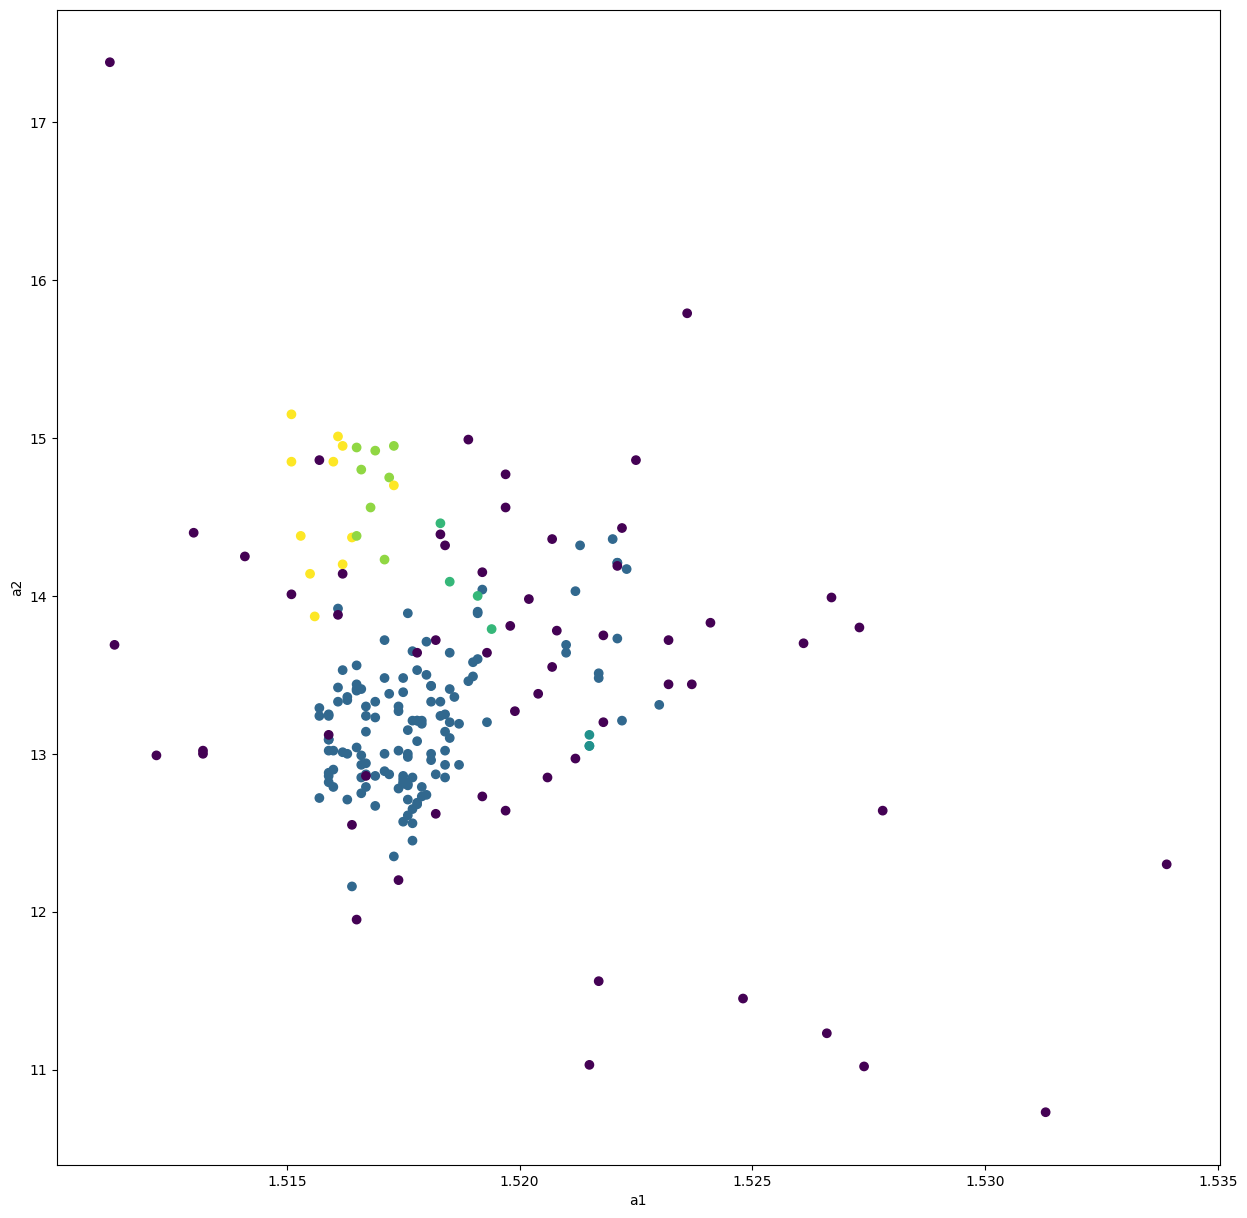

In [16]:
print("Would u like to visualize the elements?(y/n)")

datavisinput = input()
if datavisinput == "y":
    print("Write the variable to be selected for the x-axis.(Exmp: a1)")
    dataVis1 = input()
    print("Write the variable to be selected for the x-axis.(Exmp: a2)")
    dataVis2 = input()
    plt.figure(figsize=(15,15))
    plt.scatter(df[dataVis1],df[dataVis2],c=clusters)
    plt.xlabel(dataVis1)
    plt.ylabel(dataVis2)
else:
    print("The elements not visualized")

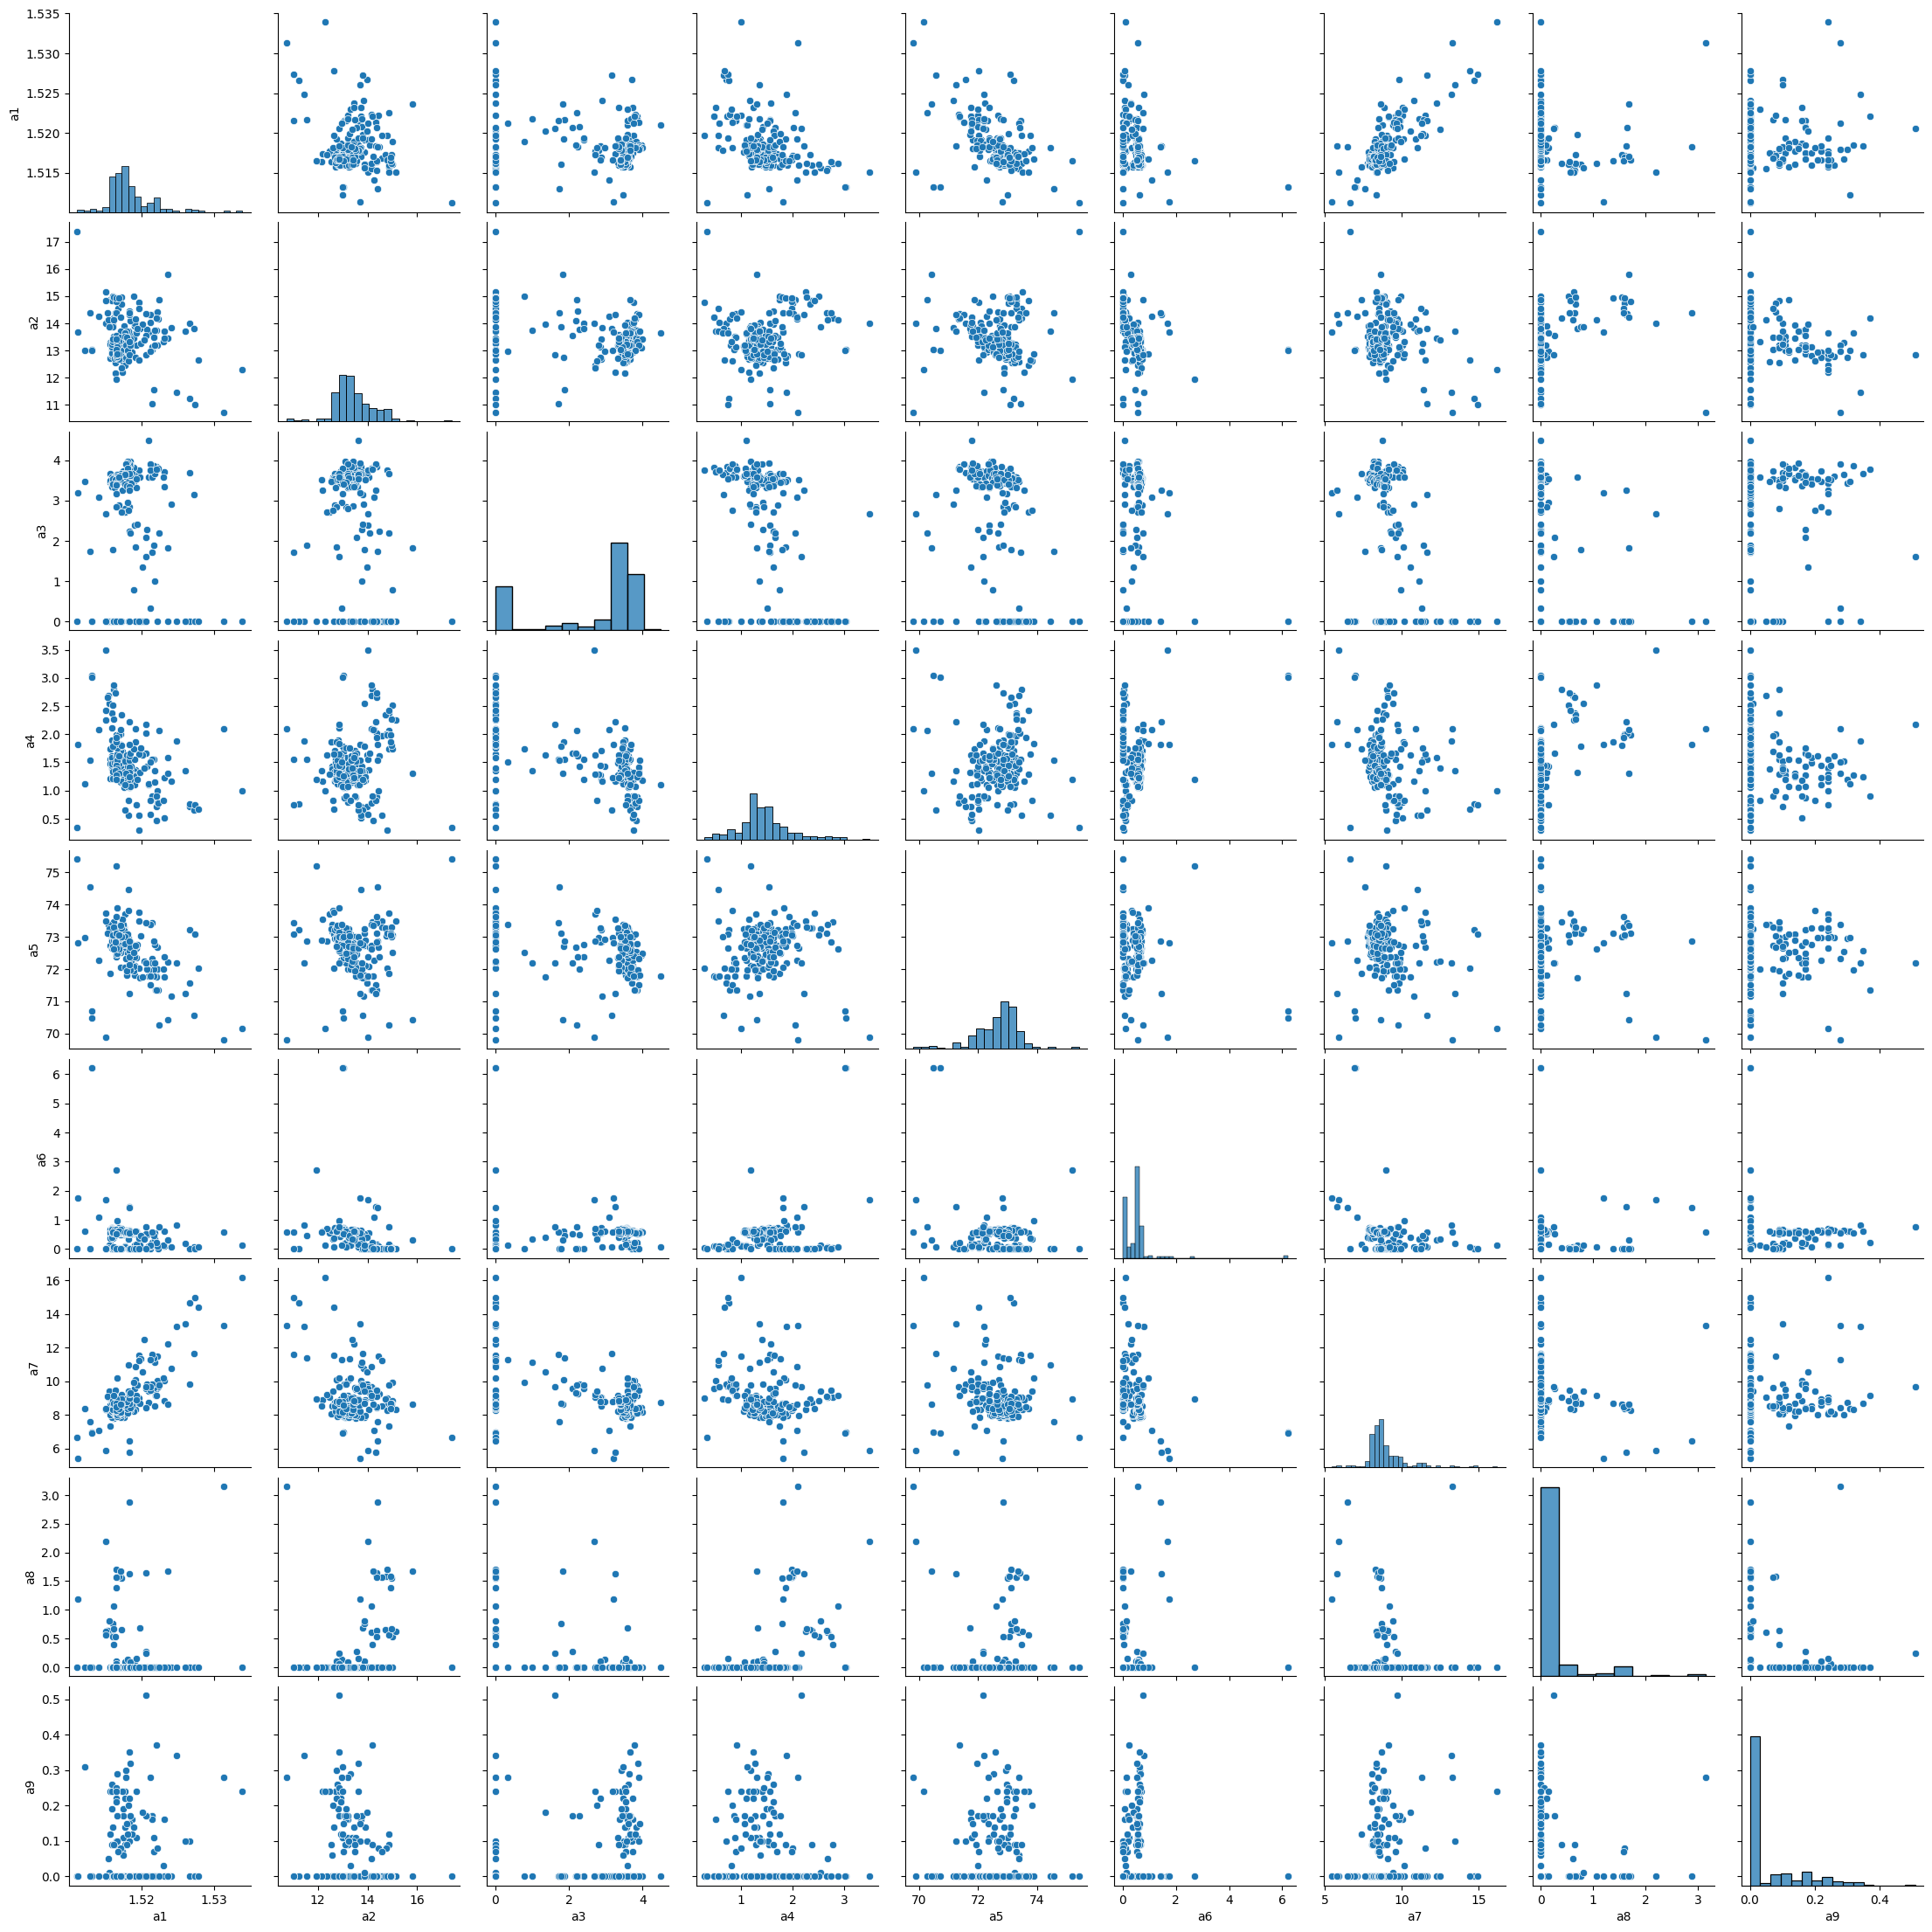

In [17]:
sns.pairplot(df)

In [18]:
#Mehmet Görenli